# TOP CANCIONES EN SPOTIFY

### Exploratory Data Analysis

En este trabajo se realizará un análisis exploratorio de datos de un DataFrame. Primero se descibirá el DataFrame y se tratarán los datos si resulta necesario. Se continuará con un Análisis Univariante y Bivariante, para finalmente exponer las conclusiones obtenidas del análisis.

Intro

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

## 1. Descripción y tratamiento inicial de los datos

Los datos son obtenidos del archivo [./top10s.xls](./top10s.xls). Se trata de un DataFrame (en adelante DF) de 602 observaciones, procedentes de las canciones que han alcanzado el _top_ de Spotify (las más populares) y 15 variables.

In [2]:
top = pd.read_excel('../data/top10s.xls')
top

,id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,Hey Soul Sister,Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
598,600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
599,601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
600,602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


In [3]:
top.isnull().any()

id           False
title        False
artist       False
top genre    False
year         False
bpm          False
nrgy         False
dnce         False
dB           False
live         False
val          False
dur          False
acous        False
spch         False
pop          False
dtype: bool

Se comprueba y confirma que no hay ningun valor nulo en el DF, pero en el caso de haberlos habido se deberían de haber borrado para no entorpecer los análisis.

Como se ha comentado previamente, el DF contiene las canciones más famosas por año en Spotify, desde 2010 a 2019.

In [4]:
top.shape

(602, 15)

Se compone de 602 filas y 15 columnas (variables).

In [5]:
top.columns

Index(['id', 'title', 'artist', 'top genre', 'year', 'bpm', 'nrgy', 'dnce',
       'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop'],
      dtype='object')

Las columnas son:

* __id__
* __title__: El título de la canción.
* __artist__: El artista de la canción.
* __top genre__: El género musical de la canción.
* __year__: El año que la canción estuvo en el Top.
* __bpm__: Los beats por minuto, es decir, el tempo de la canción.
* __nrgy__: La energía de la canción, de 0 a 100. A mayor valor, más energética es la canción.
* __dnce__: Cómo de _'bailable'_ es la canción, de 0 a 100. A mayor valor, más _'bailable'_ es la canción.
* __dB__: Los decibelios de la canción, es decir, el volumen.
* __live__: A mayor valor, más probable es que la canción fuese grabada en directo
* __val__: El ánimo de la canción, de 0 a 100. A mayor valor, más positiva es la canción.
* __dur__: La duración de la canción.
* __acous__: Cómo de acústica es la canción, de 0 a 100. A mayor valor, más acústica es la canción.
* __spch__: Cuanto mayor es el valor de esta variable, más palabras contiene la canción.
* __pop__: Popularidad de la canción, de 0 a 100. A mayor valor, más popular es la canción.

In [6]:
top.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         602 non-null    int64 
 1   title      602 non-null    object
 2   artist     602 non-null    object
 3   top genre  602 non-null    object
 4   year       602 non-null    int64 
 5   bpm        602 non-null    int64 
 6   nrgy       602 non-null    int64 
 7   dnce       602 non-null    int64 
 8   dB         602 non-null    int64 
 9   live       602 non-null    int64 
 10  val        602 non-null    int64 
 11  dur        602 non-null    int64 
 12  acous      602 non-null    int64 
 13  spch       602 non-null    int64 
 14  pop        602 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 70.7+ KB


El DF cuenta por tanto con tres variables cualitativas nominales (el título, el artista y el género) y 11 variables cuantitativas, y una variable ID que unicamente identifica las canciones.

## 2. Análisis Univariante

Se realiza un análisis univariante para conocer el comportamiento individual de cada variable, saber cómo son las variables del estudio y si servirán para unos análisis u otros. 

Primero se realizará un análisis con las variables cualitativas: título, artista y género.

## ARTISTA

Hay un total de 184 artistas en el DF:

In [7]:
top['artist'].nunique()

184

In [8]:
artistas = top.groupby(['artist']).size().reset_index(name = 'Artista').sort_values('Artista',ascending=False)
artistas

,artist,Artista
86,Katy Perry,17
83,Justin Bieber,16
114,Maroon 5,15
145,Rihanna,15
94,Lady Gaga,14
...,...,...
81,Jonas Blue,1
80,John Newman,1
78,Joey Montana,1
77,Jewel,1


De estos 184 artistas, Katy Perry es la que más canciones tiene el top desde 2010 a 2019. Es seguida por Justin Bieber, Marroon 5 y Rihanna.

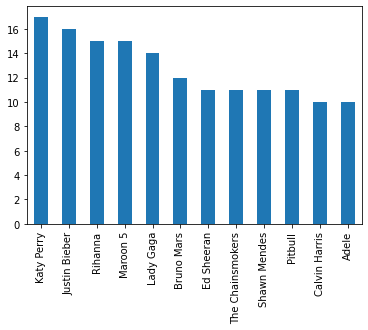

In [9]:
top['artist'].value_counts().head(12).plot.bar()

## GÉNERO


Los cinco géneros que más aparecen en las canciones más famosas de 2010 a 2019 son dance pop, pop, pop canadiense, las _'boy bands'_ y pop de Barbados. Destaca enormemente el dance pop con un total de 327 registros, es decir, más de la mitad de las canciones del DF son de este género musical. 

Adicionalmente, se puede comprobar cómo durante este periodo, la mayoría de las canciones (483, un 80,2%) pertenecen a algún subgénero del pop.

In [10]:
top['top genre'].value_counts().head(5)

dance pop        327
pop               59
canadian pop      34
boy band          15
barbadian pop     15
Name: top genre, dtype: int64

In [11]:
top['top genre'].value_counts()

dance pop                    327
pop                           59
canadian pop                  34
boy band                      15
barbadian pop                 15
electropop                    13
british soul                  11
big room                      10
neo mellow                     9
canadian contemporary r&b      9
art pop                        8
australian dance               6
hip pop                        6
complextro                     6
australian pop                 5
atl hip hop                    5
edm                            5
latin                          4
hip hop                        4
permanent wave                 4
tropical house                 3
colombian pop                  3
detroit hip hop                2
canadian hip hop               2
electronic trap                2
baroque pop                    2
escape room                    2
indie pop                      2
brostep                        2
downtempo                      2
acoustic p

Conla siguiente gráfica se puede ver la gran diferencia entre 'dance pop' y el resto de los 15 géneros musicales que más aparecen en el DF a lo largo de 2010 y hasta 2019.

Text(0.5, 0, 'Canciones en total')

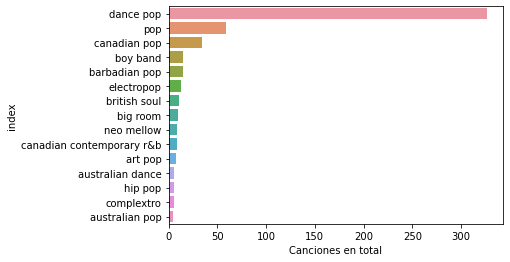

In [12]:
topgenres15 = top['top genre'].value_counts().head(15).reset_index(name = 'songs')

ax = sns.barplot(x= 'songs', y='index', data=topgenres15)
ax.set_xlabel('Canciones en total')

In [13]:
topgenres5 = top['top genre'].value_counts().head(5).reset_index(name = 'songs')
topgenres5

,index,songs
0,dance pop,327
1,pop,59
2,canadian pop,34
3,boy band,15
4,barbadian pop,15


Se crean dos DF adicionales (topgenres5 y genresfilt) para poder estudiar esta variable en análisis posteriores.

In [14]:
genrefilt = top[(top['top genre'] == 'dance pop') | (top['top genre'] == 'pop') | (top['top genre'] == 'canadian pop') | (top['top genre'] == 'barbadian pop') | (top['top genre'] == 'boy band')]
genrefilt

,id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
5,6,Baby,Justin Bieber,canadian pop,2010,65,86,73,-5,11,54,214,4,14,77
6,7,Dynamite,Taio Cruz,dance pop,2010,120,78,75,-4,4,82,203,0,9,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,596,Antisocial (with Travis Scott),Ed Sheeran,pop,2019,152,82,72,-5,36,91,162,13,5,78
597,599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
598,600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
599,601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70


Text(0.5, 1.0, 'Porcentaje de los 5 genéros más populares')

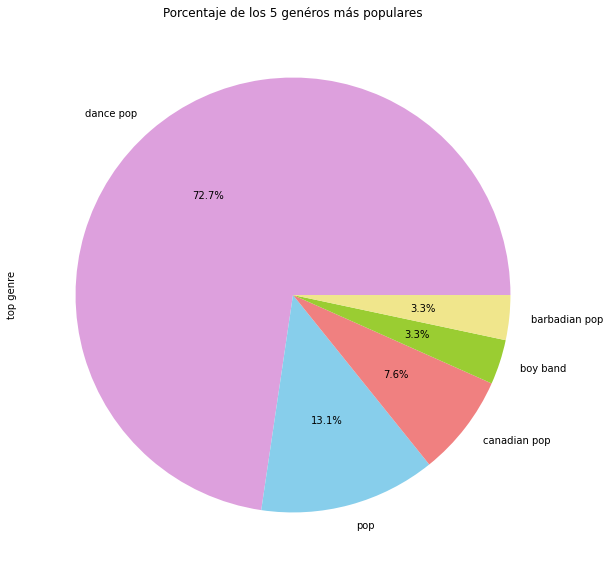

In [15]:
colors = ["plum", "skyblue", "lightcoral", "yellowgreen", 'khaki']

top['top genre'].value_counts().head(5).plot.pie(figsize=(10,10), autopct='%1.1f%%', colors = colors)
plt.title('Porcentaje de los 5 genéros más populares')


Esta gráfica circular representa los porcentajes de los cinco géneros más populares, de nuevo se aprecia una clara mayoría de 'dance pop'.

Además, hay cincuenta géneros musicales diferentes:

In [16]:
len(top['top genre'].unique())

50

## AÑO

Como se ha explicado previamente, los años de la toma de la muestra son aquellos que están entre 2010 y 2019, inclusive.

In [17]:
topYear = top.groupby(['year']).size().reset_index(name = 'Canciones')
topYear

,year,Canciones
0,2010,51
1,2011,53
2,2012,35
3,2013,71
4,2014,58
5,2015,95
6,2016,80
7,2017,65
8,2018,63
9,2019,31


Realizando una tabla que contabiliza las canciones del top se puede observar que 2015 y 2016 son los años con más canciones en este top, un total de 95 y 80 respectivamente, mientras que en 2012 y en 2019 unicamente hay 35 y 31 canciones registradas en el DF.

### BPM
Las canciones tienen una media de 118.56 bpm, siendo el máximo de beats per minute 206 y el mínimo 0.

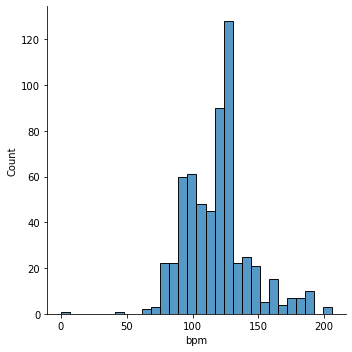

In [18]:
sns.displot(top, x = top['bpm'])

Se puede apreciar cómo la mayoría de las canciones tienen entre 120 y 130 beats por minuto.  

In [19]:
cv = ss.variation(top["bpm"])
abs(cv)

0.20907141054574646

Además, aplicando la fórmula del Coeficiente de Variación de Pearson (dt/media) a través de una función de la librería Spicy, obtenemos que la varianza es mínima y muy representativa, ya que está muy concentrada. 

## ENERGÍA

La _energía_ de las canciones se mide en una escala de 0 a 100. El máximo del DF se encuentra en 98 y el mínimo en 0, lo cual se podría considerar un error de codificación (se estudiará a continuación. La media está en torno a 70.

In [20]:
top.nrgy.describe()

count    602.000000
mean      70.478405
std       16.311966
min        0.000000
25%       61.000000
50%       74.000000
75%       82.000000
max       98.000000
Name: nrgy, dtype: float64

In [21]:
ceros = top['nrgy'] == 0
ceros.sum()

1

Hay tan solo una canción en el DF que tiene energía 0, 'Million Years Ago' de Adele. A pesar de que es una canción tranquila, un valor de energía igual a cero resulta un poco drástico, por lo que parece que es un error de codificación.

In [22]:
top[(top['nrgy'] == 0)]

,id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
442,443,Million Years Ago,Adele,british soul,2016,0,0,0,-60,0,0,227,0,0,0


Además, se puede ver cómo el resto de valores (beats por minuto, el ánimo, la popularidad, la acusticidad...) son también cero, lo cual no deja lugar a dudas: se trata de un error de codificación. Cabe la posibilidad de que esta canción esté metiendo ruido a los análisis que se puedan realizar a continuación, por lo que se eliminará del DF.

In [23]:
top = top.drop([442,])

In [24]:
ceros = top['nrgy'] == 0
ceros.sum()

0

Una vez comprobado que se ha eliminado esta fila del DF, se vuelve a realizar el análisis de los estadísticos descriptivos para verificar si se ha producido un cambio notable y por lo tanto, si esta canción estaba metiendo ruido o no.

In [25]:
top.nrgy.describe()

count    601.000000
mean      70.595674
std       16.069575
min        4.000000
25%       61.000000
50%       74.000000
75%       82.000000
max       98.000000
Name: nrgy, dtype: float64

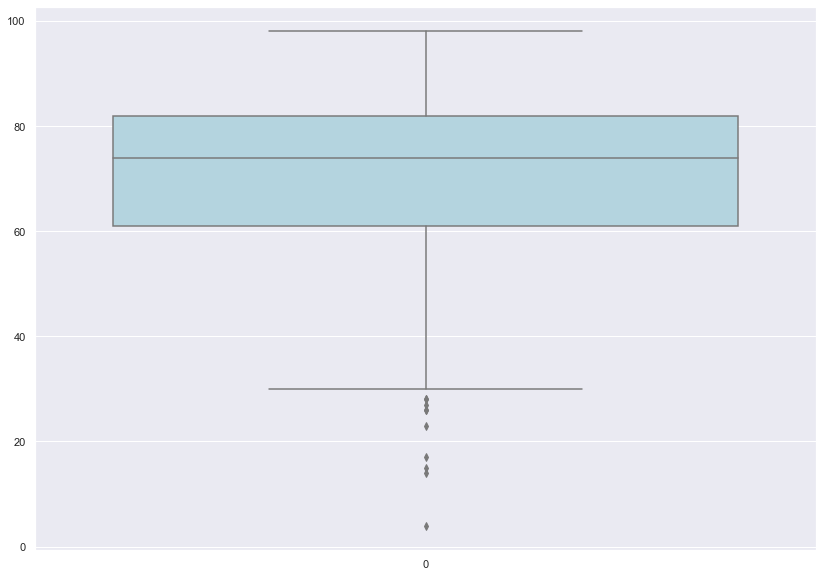

In [26]:
sns.set()
f, axes = plt.subplots(figsize=(14, 10))
sns.boxplot(data = top.nrgy, color="lightblue")

La media de esta variable no se ha visto casi alterada, por lo que la canción mal codificada no estaba influenciando de manera notable en el DF (también debido a la cantidad de observaciones). 

Adicionalmente, se ha creado un diagrama de caja para ver la dispersión de los valores. Hay algunos valores atípicos por debajo de 30 puntos de energía, y se puede observar cómo la mayoría de las canciones están entre 70 y 30 puntos de energía. 

## _'BAILABILIDAD'_

Igual que pasa con la energía, cómo de bailable es una canción está puntuado del 0 al 100. En el caso del DF los valores van de 23 a 97, con una media de 64,47.

In [27]:
top.dnce.describe()

count    601.000000
mean      64.477537
std       13.138363
min       23.000000
25%       57.000000
50%       66.000000
75%       73.000000
max       97.000000
Name: dnce, dtype: float64

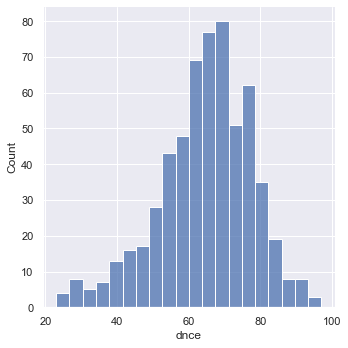

In [28]:
sns.displot(top, x = top['dnce'])

La mayoría de las canciones parecen estar entre los 60 y 80 puntos de 'bailabilidad'

## DECIBELIOS

Antes de hablar de los decibelios, es importante aclarar que el decibelio no es una unidad de medida de volumen, sino un ratio que compara el valor de un número con el de otro. Además, forman parte de una función logarítmica, por lo que nos encontramos con valores negativos. Cuanto más cercano a cero significa que la canción es más alta.

En el caso del DF los valores se encuentran entre -15 y -2dB, siendo la media -5.5dB aproximadamente.

In [29]:
top.dB.describe()

count    601.000000
mean      -5.489185
std        1.705960
min      -15.000000
25%       -6.000000
50%       -5.000000
75%       -4.000000
max       -2.000000
Name: dB, dtype: float64

In [30]:
cv = ss.variation(top["dB"])
abs(cv)

0.31052701462029203

El Coeficiente de Variación de Pearson es de 0,31, lo que significa que la varianza es muy representativa al estar muy concentrada.

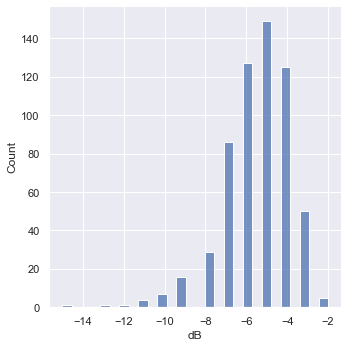

In [31]:
sns.displot(top, x = top['dB'])

## CANCIONES EN DIRECTO

La variable 'live' describe cómo de probable es que sea una canción grabada en directo. El rango del DF va desde 3 hasta 74. La media es 17, es decir la mayoría de las canciones son muy poco probables que sean grabadas en directo. Esto tiene sentido ya que la mayoría de las canciones que alcanzan los tops de spotify suelen ser canciones grabadas en estudio.

In [32]:
top.live.describe()

count    601.000000
mean      17.830283
std       13.088334
min        3.000000
25%        9.000000
50%       12.000000
75%       24.000000
max       74.000000
Name: live, dtype: float64

In [33]:
liveness = top.drop(['id', 'artist', 'year', 'bpm', 'nrgy', 'dnce', 'dB', 'val', 'dur', 'acous', 'spch', 'pop'], axis = 1)
liveness_sorted = liveness.sort_values('live',ascending=False)
liveness_sorted.head(15)


,title,top genre,live
580,Good as Hell (feat. Ariana Grande) - Remix,escape room,74
400,NO,dance pop,74
12,Cooler Than Me - Single Mix,dance pop,70
354,Time of Our Lives,dance pop,69
101,Last Friday Night (T.G.I.F.),dance pop,67
63,Monster,chicago rap,67
175,Play Hard (feat. Ne-Yo & Akon) - New Edit,dance pop,66
42,Hard,barbadian pop,65
194,Take Back the Night,dance pop,64
558,Walk On Water (feat. BeyoncÈ),detroit hip hop,64


Con el DF liveness_sorted se puede observar cómo, dentro de las 15 canciones con mayor valor de 'live', 8 pertenecen al género _dance pop_ y 4 son 'Edits' (incluyendo a 'Single Mix' o 'Remix'). Las canciones que tienen esta característica suelen ser canciones del género dance, ya que son versiones de canciones más 'dance' que suelen hacer DJs. 

Por esto, aunque no parezca haber ninguna canción gravada en vivo en el DF (las canciones que cumplen esta característica van acompañadas de la palabra 'Live' o 'Directo' en el título), parece que valores altos de esta variable están relacionados con el género de la canción.

## CANCIONES ACÚSTICAS

La variable 'acous', de manera análoga que 'live', describe cómo de probable es que la canción sea acústica. Se trata de un rango del 0 al 100, en el que a mayor valor, más posible es que sea acústica. La media se encuentra en 14, por lo que se puede afirmar que la gran mayoría de las canciones del DF no son acústicas. 

In [34]:
top.acous.describe()

count    601.000000
mean      14.371048
std       20.786384
min        0.000000
25%        2.000000
50%        6.000000
75%       17.000000
max       99.000000
Name: acous, dtype: float64

In [35]:
ceros = top['acous'] == 0
ceros.sum()

72

Hay 72 canciones que tienen un valor de 0. De estas 72, como se puede ver a continuación, hay 49 canciones que pertenecen al género dance pop. Sin embargo, habiendo 327 canciones de este género, el ser de este género no está asociado con tener un '0' en acusticidad. 

Sin embargo, sí que se ve que tener un '0' en acusticidad está muy asociado con ser una canción dance pop.

In [36]:
top[(top['acous'] == 0)].groupby(['top genre']).size()

top genre
barbadian pop        3
big room             1
boy band             2
british soul         1
canadian hip hop     1
canadian pop         3
chicago rap          1
dance pop           49
hip hop              1
indie pop            2
moroccan pop         1
permanent wave       1
pop                  6
dtype: int64

## ÁNIMO

La variable 'val' describe el ánimo de la canción. Es decir, a mayor valor, más animada es. Estos valores van del 4 al 98 en el DF. 

La media está en 52.24%, por lo que la distribución del ánimo parece estar muy repartida. 

In [37]:
top.val.describe()

count    601.000000
mean      52.244592
std       22.387684
min        4.000000
25%       35.000000
50%       52.000000
75%       69.000000
max       98.000000
Name: val, dtype: float64

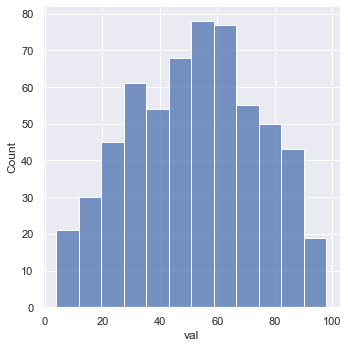

In [38]:
sns.displot(top, x = top['val'])

El gráfico muestra una distribución aproximadamente normal. 

## DURACIÓN

La duración de la canción está explicada por la variable _dur_ en segundos. Las duraciones de las canciones del DF van desde 134' (dos minutos, aproximadamente) a 424' (siete minutos), pero la media se sitúa en unos 224', tres minutos y pico. 

In [39]:
top.dur.describe()

count    601.000000
mean     224.683860
std       34.185327
min      134.000000
25%      202.000000
50%      221.000000
75%      240.000000
max      424.000000
Name: dur, dtype: float64

A continuación se pueden observar las cinco canciones de mayor duración, siendo la más larga 'TKO' de Justin Timberlake.

In [40]:
duration = top.drop(['id', 'year', 'bpm', 'nrgy', 'dnce', 'dB', 'val', 'acous', 'spch', 'pop', 'live'], axis = 1)
duration_sorted = duration.sort_values('dur',ascending=False)
duration_sorted.head(5)

,title,artist,top genre,dur
188,TKO,Justin Timberlake,dance pop,424
422,Wish That You Were Here - From ìMiss Peregrine...,Florence + The Machine,art pop,403
63,Monster,Kanye West,chicago rap,379
162,Lose Yourself to Dance,Daft Punk,electro,354
194,Take Back the Night,Justin Timberlake,dance pop,353


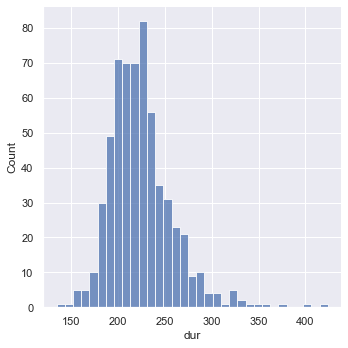

In [41]:
sns.displot(top, x = top['dur'])

## PALABRAS

La variable 'spch' mide la cantidad de palabras que se dicen en una canción del 0 al 48. A mayor número, mayor cantidad de palabras. 

La media de palabras está en los 8.3 puntos.

In [42]:
top.spch.describe()

count    601.000000
mean       8.369384
std        7.487545
min        3.000000
25%        4.000000
50%        5.000000
75%        9.000000
max       48.000000
Name: spch, dtype: float64

La canción que más palabras tiene del DF es 'How Ya Doin'?' de Little Mix.

In [43]:
palabras = top.drop(['id', 'year', 'bpm', 'nrgy', 'dnce', 'dB', 'val', 'dur', 'acous', 'live', 'pop'], axis = 1)
palabras_sorted = palabras.sort_values('spch',ascending=False)
palabras_sorted.head(3)

,title,artist,top genre,spch
200,How Ya Doin'? (feat. Missy Elliott),Little Mix,dance pop,48
14,Like A G6,Far East Movement,dance pop,45
364,Love Yourself,Justin Bieber,canadian pop,44


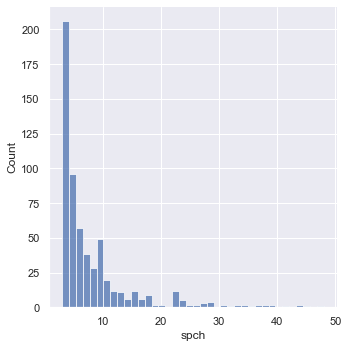

In [44]:
sns.displot(top, x = top['spch'])

## POPULARIDAD

Para concluir el Análisis Univariante, se estudiará la variable 'pop'. Esta variable mide del 0 al 100 cómo de popular es una canción. Hay que tener en cuenta que todas las canciones pertenecen al top de Spotify a lo largo de los años, por lo que esta variable compara entre ellas. 


In [45]:
top['pop'].describe()

count    601.000000
mean      66.612313
std       14.278111
min        0.000000
25%       60.000000
50%       69.000000
75%       76.000000
max       99.000000
Name: pop, dtype: float64

Destaca que el valor mínimo sea 0, por lo que se estudiará a continuación qué canciones son las que tienen este valor, así como las canciones más populares.

In [46]:
top[(top['pop'] == 0)]

,id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
50,51,Hello,Martin Solveig,big room,2010,128,98,67,-3,10,45,191,1,3,0
138,139,Blow Me (One Last Kiss),P!nk,dance pop,2012,114,92,60,-3,25,75,256,0,4,0
267,268,Not a Bad Thing,Justin Timberlake,dance pop,2014,86,73,59,-6,38,46,266,27,6,0
362,363,L.A.LOVE (la la),Fergie,dance pop,2015,202,39,48,-8,26,27,193,2,9,0


La canción 'Hello' de Marting Solveig tiene discos platino en seis diferentes paises, alcanzando el puesto número 46 en la Billboard Hot 100 en 2011. 
'Blow Me (One Last Kiss)' de P!nk, tiene diez discos platino en 5 paises. 'Not a Bad Thing' de Justin Timberlake quedó en octava posición el Billboard en 2014 y 'L.A.LOVE (la la)' de Fergie tiene un disco platino en Estados Unidos. 

Estos méritos no son alcanzados por todas las canciones y si bien es posible que no sean las más populares del DF, se asume que su puntuación de '0' se trata de un error de codificación. 

In [47]:
popularity = top.drop(['id', 'year', 'bpm', 'nrgy', 'dnce', 'dB', 'val', 'acous', 'spch', 'dur', 'live'], axis = 1)
popularity_sorted = popularity.sort_values('pop',ascending=False)
popularity_sorted.head(5)

,title,artist,top genre,pop
571,Memories,Maroon 5,pop,99
572,Lose You To Love Me,Selena Gomez,dance pop,97
573,Someone You Loved,Lewis Capaldi,pop,96
574,SeÒorita,Shawn Mendes,canadian pop,95
575,How Do You Sleep?,Sam Smith,pop,93


Para respaldar la hipótesis de que las canciones con un valor de cero en la variable 'pop' están mal codificadas, se señala que 'Memories' de Maroon5 (la canción más popular del DF) tiene 9 discos de platino en diferentes países, al nivel de las mencionadas anteriormente. 

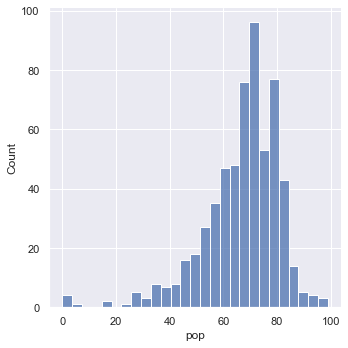

In [48]:
sns.displot(top, x = top['pop'])

Como se puede observar en el histograma, hay una cola izquierda pesada. Se suaviza un poco si se acota más, eliminando las canciones con una puntuación de 0. 

In [49]:
top = top.drop([50,])
top = top.drop([138,])
top = top.drop([267,])
top = top.drop([362,])

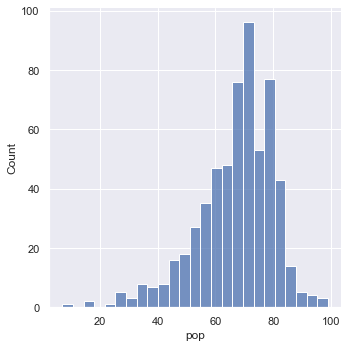

In [50]:
sns.displot(top, x = top['pop'])

## 3. Análisis Bivariante

A continuación se realizará un Análisis Bivariante para saber si hay dependencia entre variables, y cómo el comportamiento de una afecta a la otra. 

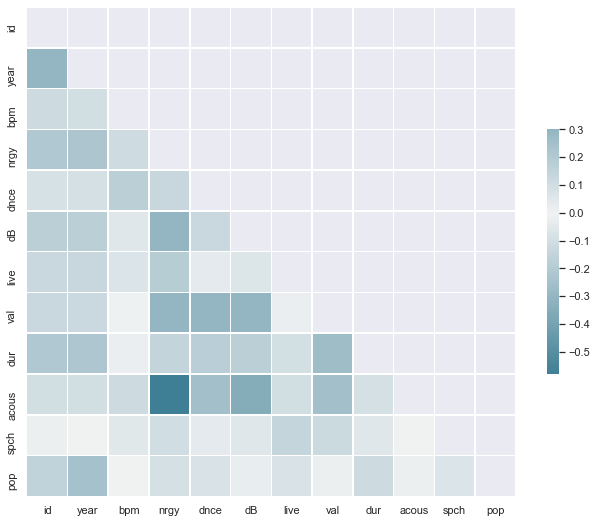

In [51]:
corr = top.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(222, 222, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Se puede apreciar gracias a matriz diagonal de correlación que las variables que más correlacionadas están son claramente la acusticidad y la energía. 

En este apartado se analizará la relación de la energía con las características de una canción, la evolución de las variables del DF a través de los años, la relación de las variables con el ánimo de una canción, cómo de bailable es una canción en función del género y cómo afectan las variables del DF a la popularidad de una canción.

## Relación de la energía con las características de una canción

#### Energía - Acusticidad

Parece estar inversamente relacionado la acusticidad de una canción con la energía (lo cual tiene sentido), como se puede apreciar claramente en el gráfico siguiente. 

Esto quiere decir que, cuanto más acústica sea una canción, menos energía tiene.

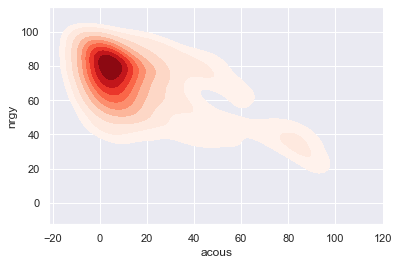

In [52]:
sns.kdeplot(x = top.acous, y = top.nrgy, cmap="Reds", shade=True)


#### Energía - Directo

Como se ha comprobado en el análisis univariante, la variable 'live' no explica que las canciones estén grabadas en directo si no más bien que las canciones sean 'edits' o 'remixes'. Podemos ver en la parte derecha de la tabla cómo hay una relación en energía alta con este tipo de canciones, pero sin embargo canciones con valores bajos en la variable 'live' siguen teniendo mucha energía, por lo que se puede asumir que la energía de una canción no está relacionada con la variable 'live'.

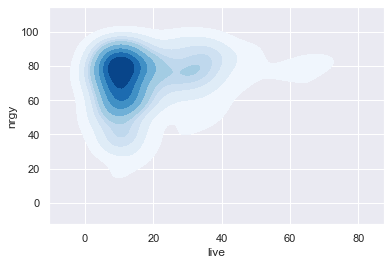

In [53]:
sns.kdeplot(x = top.live, y = top.nrgy, cmap="Blues", shade=True)


#### Energía - Bailabilidad

Cuando se estudia la relación entre la energía y la bailabilidad de una canción, se ve una clara relación positiva. Esto quiere decir que cuanto más energética sea, más fácil es bailarla. 

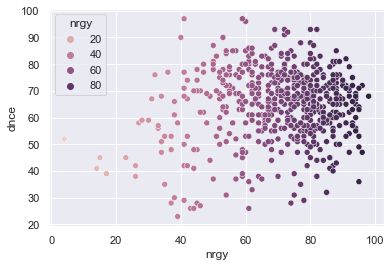

In [54]:
sns.scatterplot(data=top, x='nrgy', y='dnce', hue='nrgy')

### Evolución de las variables a través de los años

#### Año - Bailabilidad

Se puede apreciar un ligero incremento paulatino de cómo de bailable son las canciones que llegan al top de Spotify a lo largo de los años, lo que podría ser una tendencia a que, en un futuro, las canciones sean más bailables.

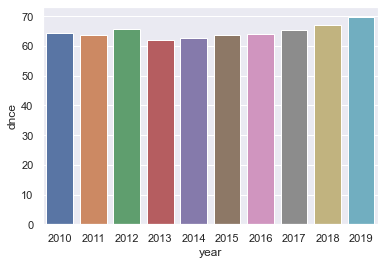

In [55]:
sns.barplot(data = top, x = 'year', y ='dnce', ci =None)

#### Año - Género

Esta variable es interesante estudiarla porque los géneros más populares han ido variando ligeramente a través de los años. 

En 2010 las canciones eran, mayoritariamente dance pop, pero también se encuentran canciones de hip pop, pop, hip hop alternativo y pop australiano, aunque en mucha menor medida

In [56]:
top.groupby(['top genre', 'year']).size().reset_index(name = 'Genre').sort_values('Genre',ascending=False)
y2010 = genreyear['year'] == 2010
y2010_filt = genreyear[y2010]
genre10 = y2010_filt.head(5)
sns.barplot(data = genre10, x = 'top genre', y ='Genre', ci =None)

NameError: name 'genreyear' is not defined

Sin embargo, en 2011 aparecen los géneros soul británico, pop de Barbados y pop acústico, desapareciendo el 'hip pop' del top 5.

In [ ]:
y2011 = genreyear['year'] == 2011
y2011_filt = genreyear[y2011]
genre11 = y2011_filt.head(5)
sns.barplot(data = genre11, x = 'top genre', y ='Genre', ci =None)

En 2012 se experimenta un decremento muy notable del género dance pop, y aparecen el pop canadiense y las _boy bands_.

In [ ]:
y2012 = genreyear['year'] == 2012
y2012_filt = genreyear[y2012]
genre12 = y2012_filt.head(5)
sns.barplot(data = genre12, x = 'top genre', y ='Genre', ci =None)


En 2013 dance pop vuelve a sus valores de años anteriores (2010, 2011) y se pone de _moda_ la música electrónica.

In [ ]:
y2013 = genreyear['year'] == 2013
y2013_filt = genreyear[y2013]
genre13 = y2013_filt.head(5)
sns.barplot(data = genre13, x = 'top genre', y ='Genre', ci =None)

Estas tendencias se mantienen, con ligeras variaciones, hasta 2019, donde el pop se convierte protagonista de las canciones más populares de Spotify.

In [ ]:
y2019 = genreyear['year'] == 2019
y2019_filt = genreyear[y2019]
genre19 = y2019_filt.head(5)
sns.barplot(data = genre19, x = 'top genre', y ='Genre', ci =None)

#### Año - Ánimo

El año no parece ser determinante en el estado de ánimo de las canciones, aunque se puede observar en el gráfico que aparece a continuación que 2012 fue el año con las canciones más animadas. 

In [ ]:
sns.barplot(data = top, x = 'year', y ='val', ci =None)


#### Año - Popularidad

La popularidad de las canciones parece aumentar a lo largo del periodo 2010-2019. Esto tal vez se deba al aumento paralelo de la popularidad de Spotify, lo que hace que cada vez más personas escuchen música a través de esta plataforma.

In [ ]:
sns.barplot(data = top, x = 'year', y ='pop', ci =None)


#### Año - Energía

Al pesar de al principio del estudio de los años con las variables se ha visto un aumento de la bailabilidad, la energía (variable que parece estár relacionada directamente con la bailabilidad) parece que se va reduciendo. Esto se debería estudiar en futuros análisis para comprenderlo mejor.

In [ ]:
sns.barplot(data = top, x = 'year', y ='nrgy', ci =None)


### Relación de las variables con el ánimo de una canción

#### Ánimo - Género

Según el gráfico de cajas, las _boy bands_ parecen ser las canciones que tienen menos valores bajos de ánimo. 

In [ ]:
sns.boxplot(data = genrefilt, x = 'val', y = 'top genre')


#### Ánimo - Energía

El ánimo y la energía está positivamente relacionado, ya que parece que a mayor energía, más animada es una canción.

In [ ]:

sns.lineplot(data = top, x = "val", y = "nrgy", color = 'olivedrab') 
             

#### Ánimo - dB

De manera análoga, a mayores decibelios parece aumentar el ánimo de una canción.

In [ ]:
sns.lineplot(data = top, x = "val", y = "dB", color = 'olivedrab') 


#### Ánimo - Bailabilidad

El ánimo y la bailabilidad también están positivamente relacionadas, lo cual se puede ver de manera clara en la gráfica: aumenta la facilidad de bailar una cacnión cuando aumenta el ánimo de esta, y viceversa.

In [ ]:
sns.lineplot(data = top, x = "val", y = "dnce", color = 'olivedrab') 


#### Ánimo - Acusticidad y Ánimo - Duración

La variable ánimo está negativamente relacionada con la acusticidad y la duración. Esto quiere decir que las canciones que sean más acústicas y más largas, serán menos animadas. 

In [ ]:
sns.set()

val = sns.PairGrid(top, y_vars = ['acous', 'dur'] , x_vars = ['val'], aspect = 2)

val = val.map(sns.lineplot, color="indianred")


### Bailabilidad por género

Dentro de los quince géneros más populares, los más bailables parecen ser el pop y el pop canadiese, y los menos fáciles de bailar el r&b canadiense contemporáneo, el complextro y el hip pop.

In [ ]:
genrefilt15 = top[(top['top genre'] == 'dance pop') | (top['top genre'] == 'pop') | (top['top genre'] == 'canadian pop') |
                   (top['top genre'] == 'barbadian pop') | (top['top genre'] == 'boy band') | (top['top genre'] == 'electropop')| (top['top genre'] == 'british soul')| (top['top genre'] == 'canadian contemporary r&b')| 
                   (top['top genre'] == 'big room')| (top['top genre'] == 'neo mellow')| (top['top genre'] == 'art pop')| (top['top genre'] == 'australian dance')| (top['top genre'] == 'complextro')| 
                  (top['top genre'] == 'hip pop')| (top['top genre'] == 'alt hip hop')]


In [ ]:
b = sns.stripplot(data = genrefilt15, x = 'top genre', y = 'dnce')
b.set(xticks=[])
plt.legend(labels=['dance pop', 'pop', 'canadian pop', 'barbadian pop',
          'boy band', 'electropop','british soul','canadian contemporary r&b',
          'big room','neo mellow','art pop','australian dance',
           'complextro','hip pop','alt hip hop'], bbox_to_anchor=(1, 0.5))

### Popularidad de las canciones en función de diferentes variables

#### Popularidad - Energía

El el diagrama de dispersión de estas dos variables se aprecia cómo hay una tendencia a la popularidad cuanto más energética es una canción.

In [ ]:

sns.scatterplot(data=top, x='pop', y='nrgy', hue='nrgy', palette = 'YlOrBr')


#### Popularidad - Bailabilidad

Lo mismo pasa con la bailabilidad, aunque la relación no es tan clara.

In [ ]:

sns.scatterplot(data=top, x='pop', y='dnce', hue='dnce', palette = 'YlOrBr')


#### Popularidad - Ánimo

Y finalmente, parece verse que aunque está ligeramente relacionada la popularidad con el ánimo, no es tan determinante.

In [ ]:

sns.scatterplot(data=top, x='pop', y='val', hue='val', palette = 'YlOrBr')


## 4. Conclusiones

* Hay __184__ artistas con una canción en el top de Spotify en los últimos diez años.
* __Katy Perry__ es la artista con más canciones en el top en el periodo 2010-2019 (17 canciones) seguida de __Justin Bieber__ (16).
* __Dance pop__ es el género que más aparece en el DF y por tanto, se podría asumir que el más popular.
* La canción que más tiempo dura (7 minutos) es __TKO__ de Justin Timberlake.
* La canción con más palabras es __How Ya Doin'?__ de Little Mix.
* La canción más popular en el periodo del DF es __Memories__ de Maroon5.
* A mayor energía de una cacnión, más bailable y menos acústica es.
* De 2010 a 2018 el género más popular es el _dance pop_, pero en 2019 es el __pop__.
* La bailabilidad de las canciones aumenta a lo largo de los años.
* __2012__ es el año con las canciones más animadas.
* Cuando aumentan los decibelios, la energía o la bailabilidad de una canción, aumenta su __ánimo__.
* El ánimo se reduce cuato más larga o más acústica es una canción.
* Los géneros más faciles de bailar son el __pop__ y el __pop canadiense__, mientras que los más difíciles son el __complextro__ y el __r&b contemporáneo canadiense.
* La energía y la bailabilidad de una cación parecen estar relacionadas de manera positiva con la popularidad.

Aunque habría que continuar estudiando las variables para comprender mejor sus relaciones, a raíz de haber realizado este EDA surge la pregunta de si se podría crear una canción que llegase al top de Spotify. 

Por supuesto, la popularidad de una cacnión está altamente relacionada con cómo de conocido es el artista, lo cual no aparece en el DF y es muy relevante. 

## 5. Bibliografía

Los enlaces que se han consultado, junto con apuntes y ejercicios de la asignatura _Python_, son los siguientes:

https://towardsdatascience.com/exploratory-data-analysis-in-python-c9a77dfa39ce

https://www.interactivechaos.com/manual/tutorial-de-seaborn/count-plot

https://blog.adrianistan.eu/estadistica-python-media-mediana-varianza-percentiles-parte-iii

https://seaborn.pydata.org/examples/many_pairwise_correlations.html

https://steakrecords.com/es/716617-seaborn-snsset-changing-plot-background-color-python-seaborn.html

https://python-graph-gallery.com/category/seaborn/

https://www.interactivechaos.com/manual/tutorial-de-seaborn/diagrama-de-dispersion

https://python-graph-gallery.com/161-custom-matplotlib-donut-plot/

https://showmecode.info/python/matplotlib/pie/change-pie-colors/#:~:text=Use%20the%20colors%20parameter%20to,pie%20chart%20colors%20in%20Matplotlib.

https://matplotlib.org/examples/color/named_colors.html

https://stackoverflow.com/questions/40088585/turn-off-error-bars-in-seaborn-bar-plot

https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

https://stackoverflow.com/questions/46173419/seaborn-change-bar-colour-according-to-hue-name